Census Income Project
Problem Statement:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $ 50k a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
df=pd.read_csv('census_income[1].csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Checking for columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.shape

(32560, 15)

We have 32560 rows and 15 columns
Target is the income column

In [7]:
# Check for missing values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values

In [8]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains object type and integer type data's.

In [32]:
# Check for numerical and catagorical columns
num_col=df.select_dtypes(include=[np.number]).columns
cat_col=df.select_dtypes(include=[np.object]).columns
print('numerical:',num_col)
print('catagorical:',cat_col)

numerical: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')
catagorical: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


In [33]:
# Checking target column
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

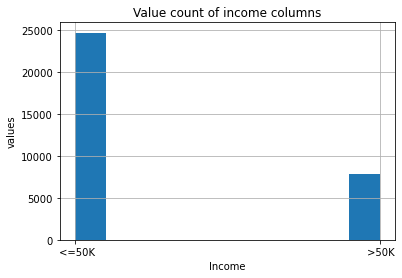

In [34]:
#plotting histogram
df['Income'].hist(grid=True)
plt.ylabel('values')
plt.xlabel('Income')
plt.title('Value count of income columns')
plt.show()

The target Income column looks imbalanced.

In [47]:
#Distribution of Age
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

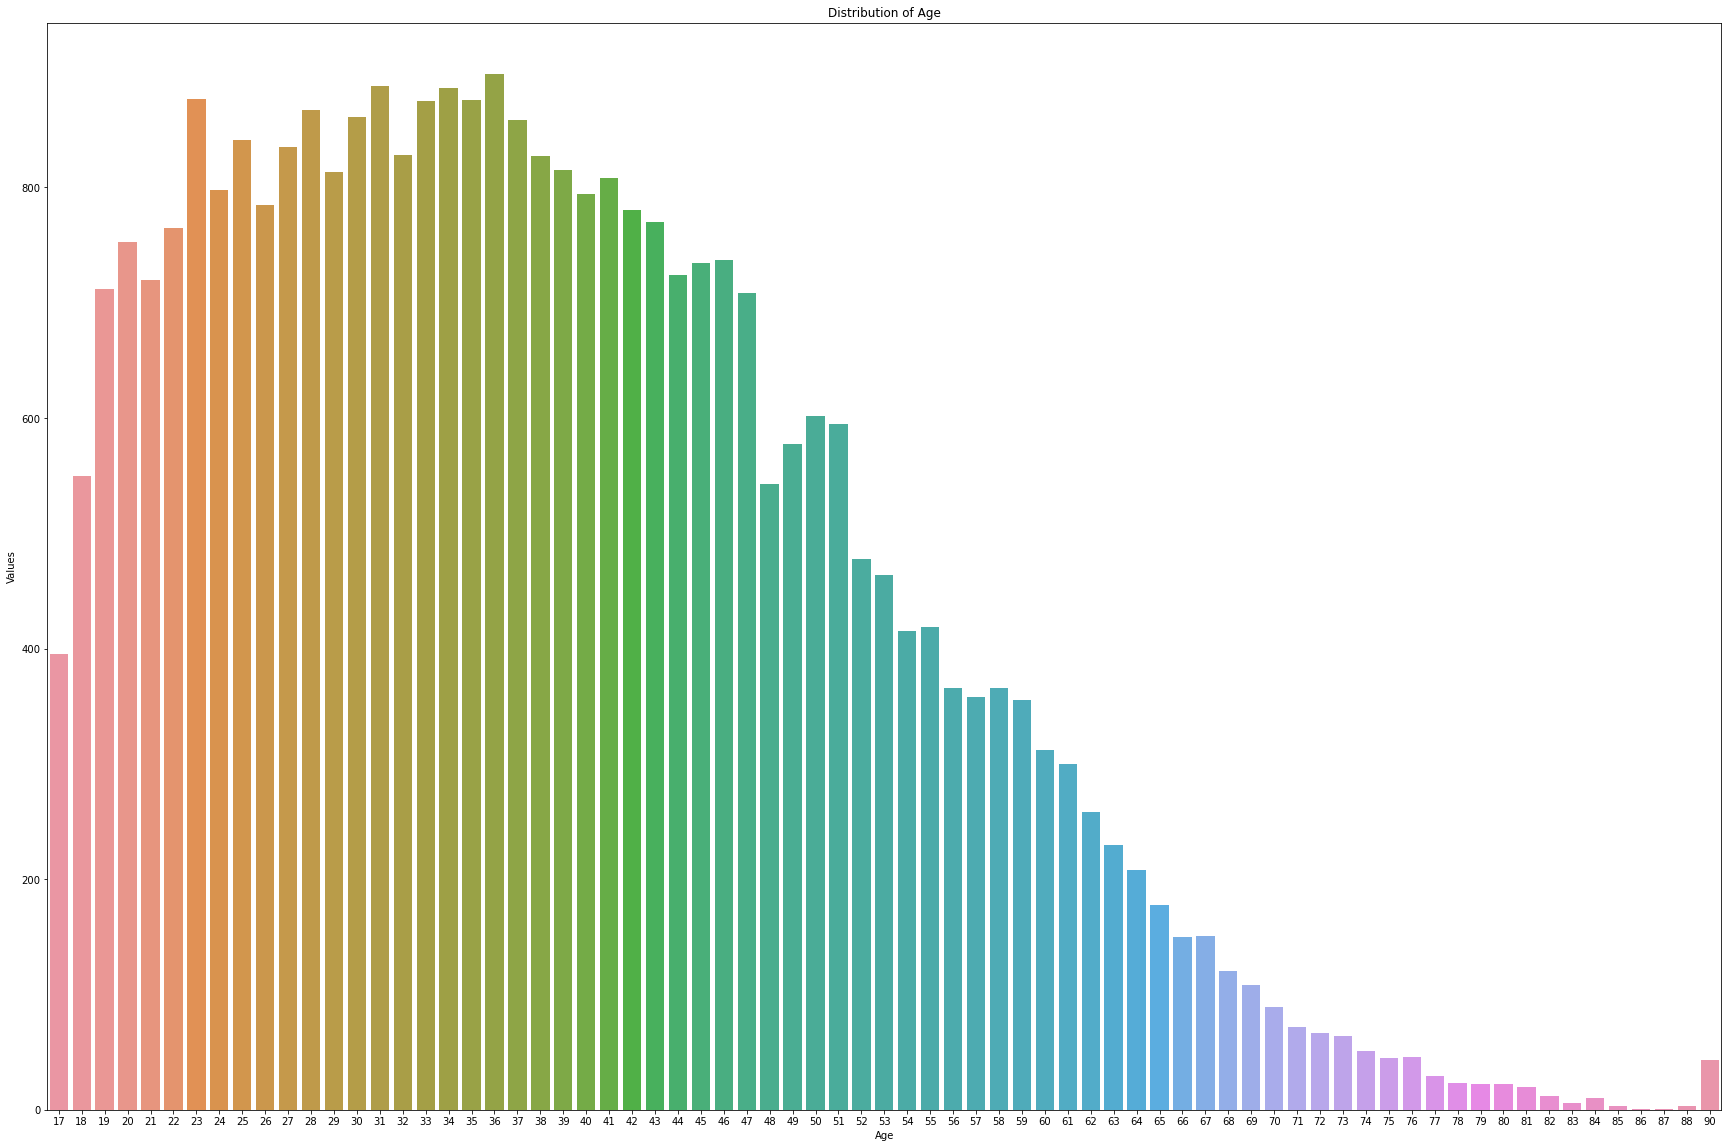

In [50]:
# plotting Graph for Age Distribution
plt.figure(figsize=[30,20])
sns.countplot(x='Age', data=df)
plt.ylabel('Values')
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()


The maximum employees are in the age group 19 to 50

In [51]:
#Distribution of Workclass
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

It has to be observed that the details of 1836 members are missing, 14 are without pay and 7 are never worked.

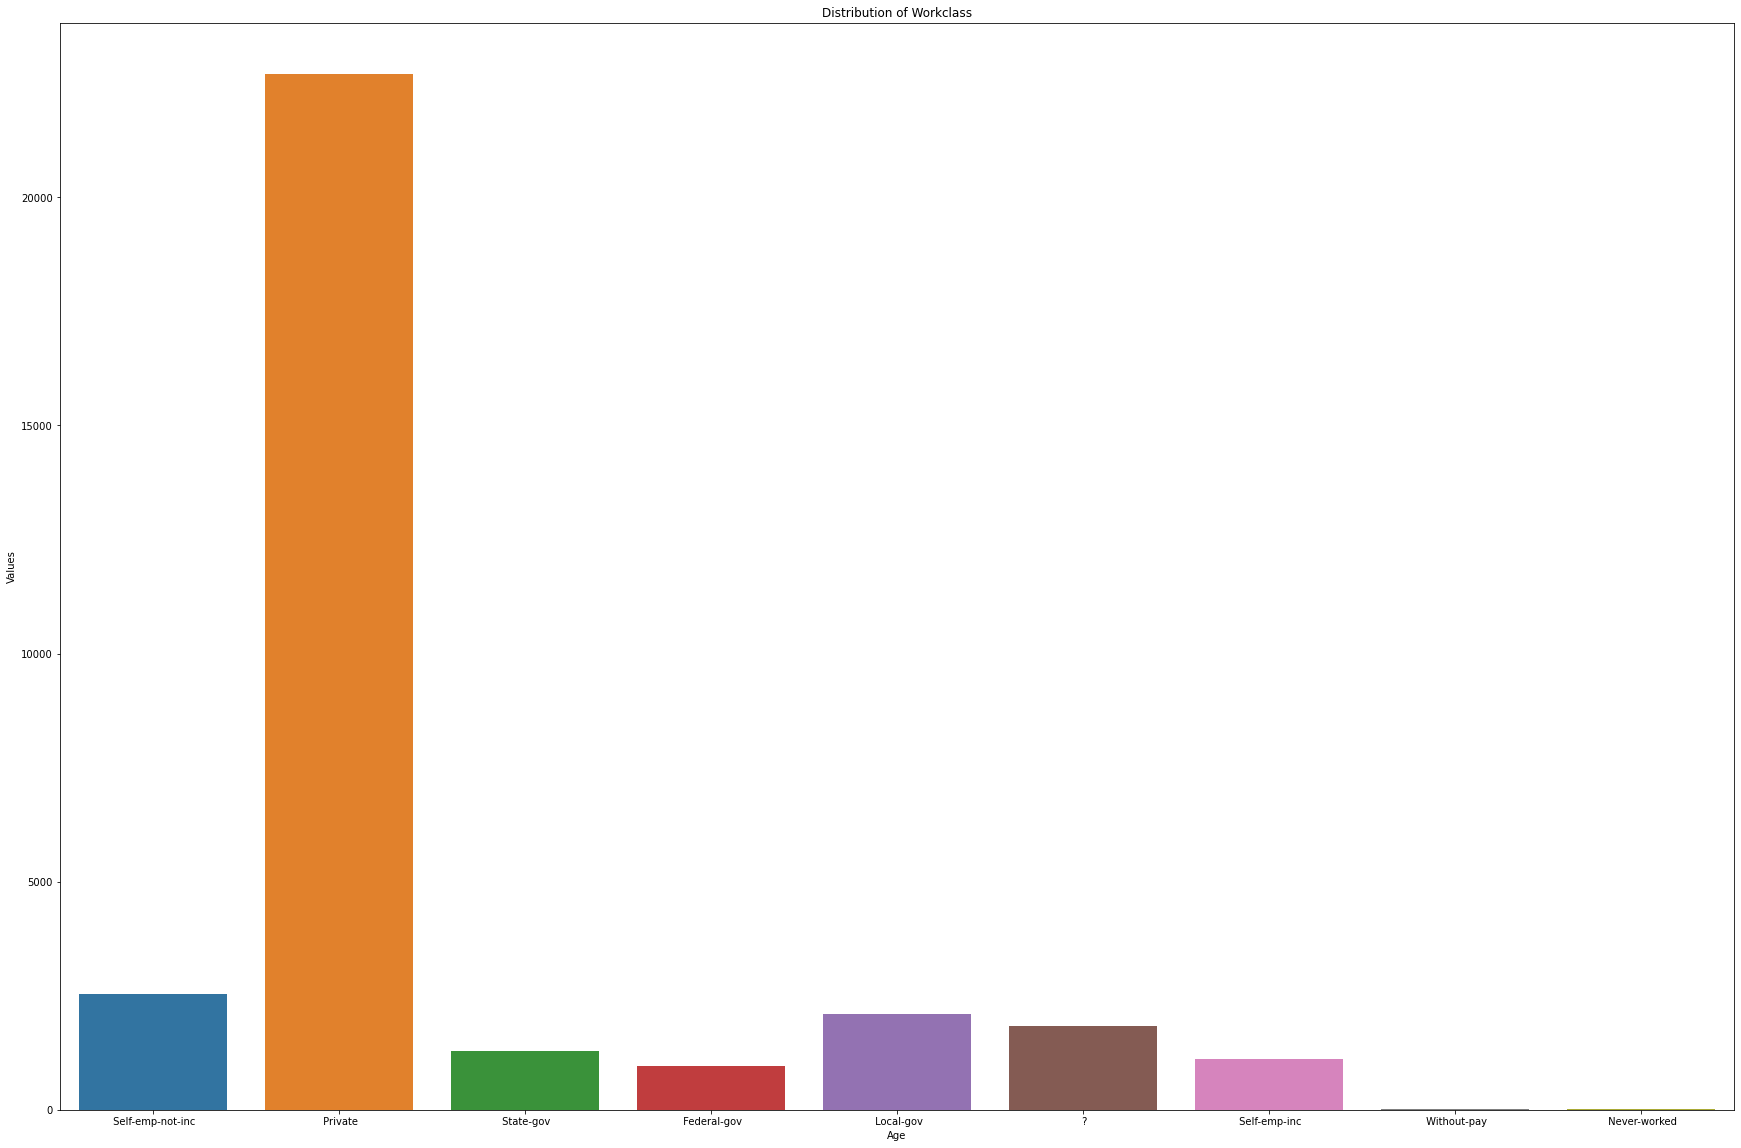

In [53]:
# plotting Graph for Workclass Distribution
plt.figure(figsize=[30,20])
sns.countplot(x='Workclass', data=df)
plt.ylabel('Values')
plt.xlabel('Age')
plt.title('Distribution of Workclass')
plt.show()

Maximum are in private sector

In [54]:
# Checking for the distribution of Education column.
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

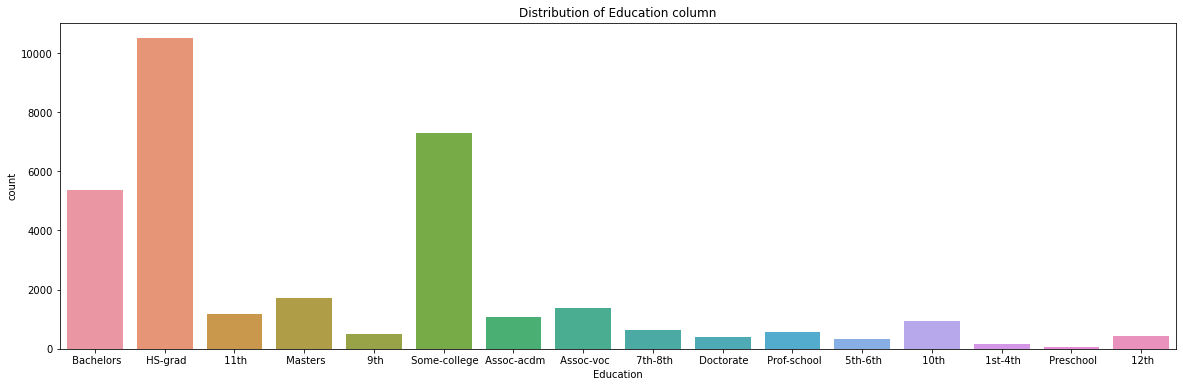

In [55]:
#Plotting graph to show the distribution of the Education column.
plt.figure(figsize=[20,6])
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education column')
plt.show()

Maximum education recevied is from high school graduation.

In [56]:
# Checking for the value counts of the 'Sex' column
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

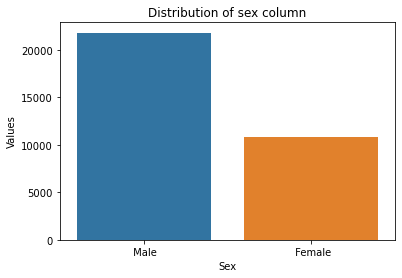

In [57]:
# Plotting graph to show the distribution of 'Sex' column
plt.figure(figsize=[6,4])
sns.countplot(x='Sex', data=df)
plt.ylabel('Values')
plt.xlabel('Sex')
plt.title('Distribution of sex column')
plt.show()

Male population is more than female.

In [58]:
# Checking for the value counts of the 'Race' column.
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

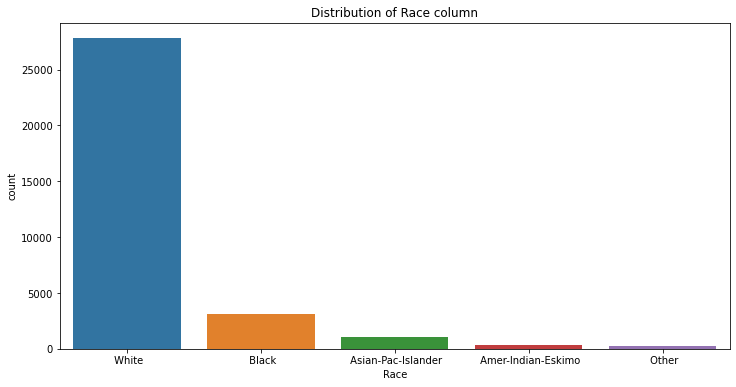

In [59]:
# Showing the distribution of 'Race' column on graph.
plt.figure(figsize=[12,6])
sns.countplot(x='Race', data=df)
plt.title('Distribution of Race column')
plt.show()

Maximum race is white people.

In [61]:
# Label Encoding
# Label encoding the categorical features.
df['Workclass'] = LabelEncoder().fit_transform(df['Workclass'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_status'] = LabelEncoder().fit_transform(df['Marital_status'])
df['Occupation'] = LabelEncoder().fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder().fit_transform(df['Relationship'])
df['Race'] = LabelEncoder().fit_transform(df['Race'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Native_country'] = LabelEncoder().fit_transform(df['Native_country'])
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [62]:
# checking for encoded data
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [65]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

All columns are integer.

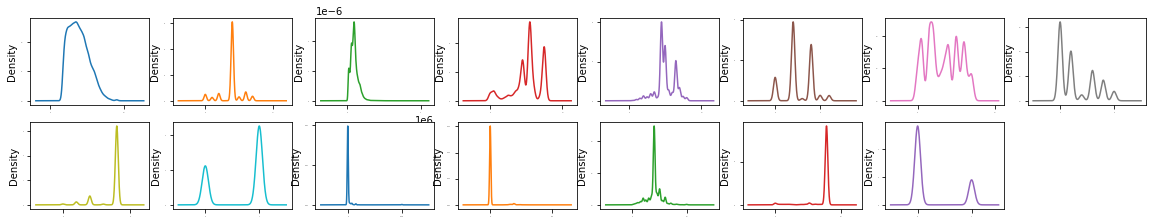

In [67]:
# checking data distribution of columns through graph
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=[20,15])
plt.show()

Can observe some skewness in data.

In [68]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


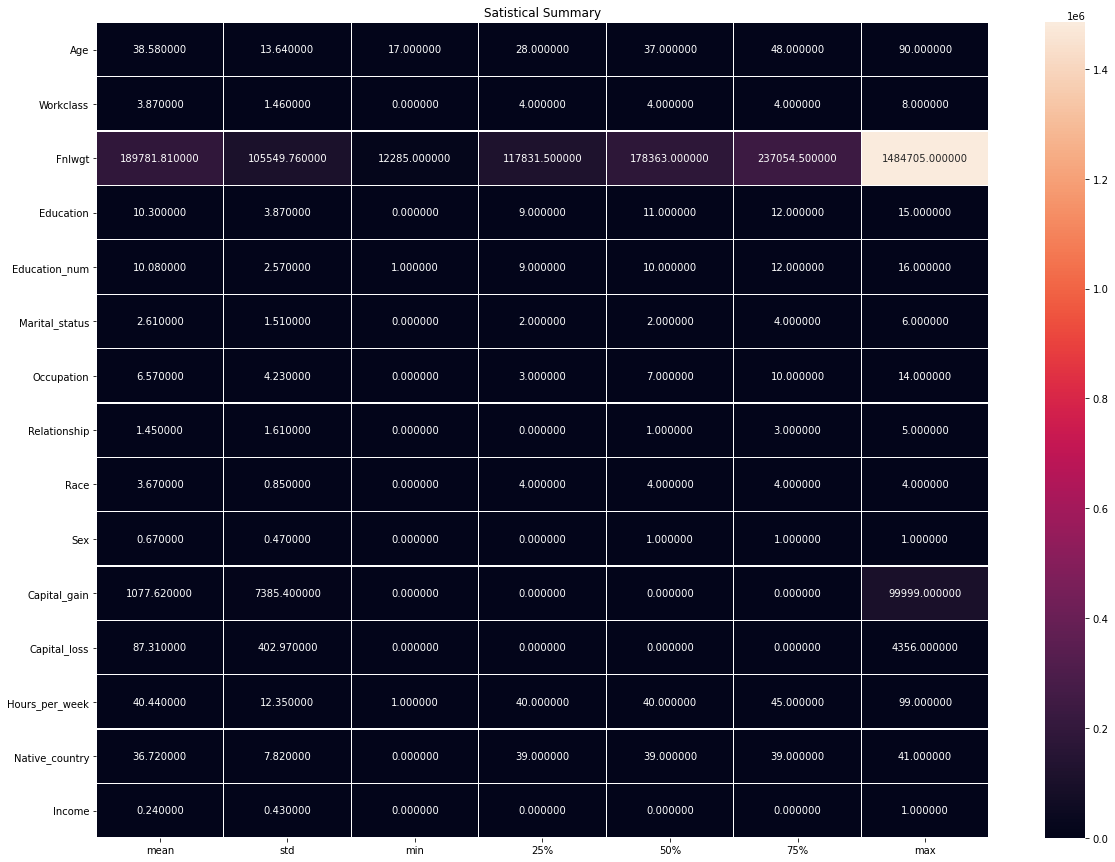

In [71]:
# plotting heatmap for data
plt.figure(figsize=[20,15])
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.3, linecolor='white', fmt='f')
plt.title('Satistical Summary')
plt.show()

In [72]:
#checking correlation
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


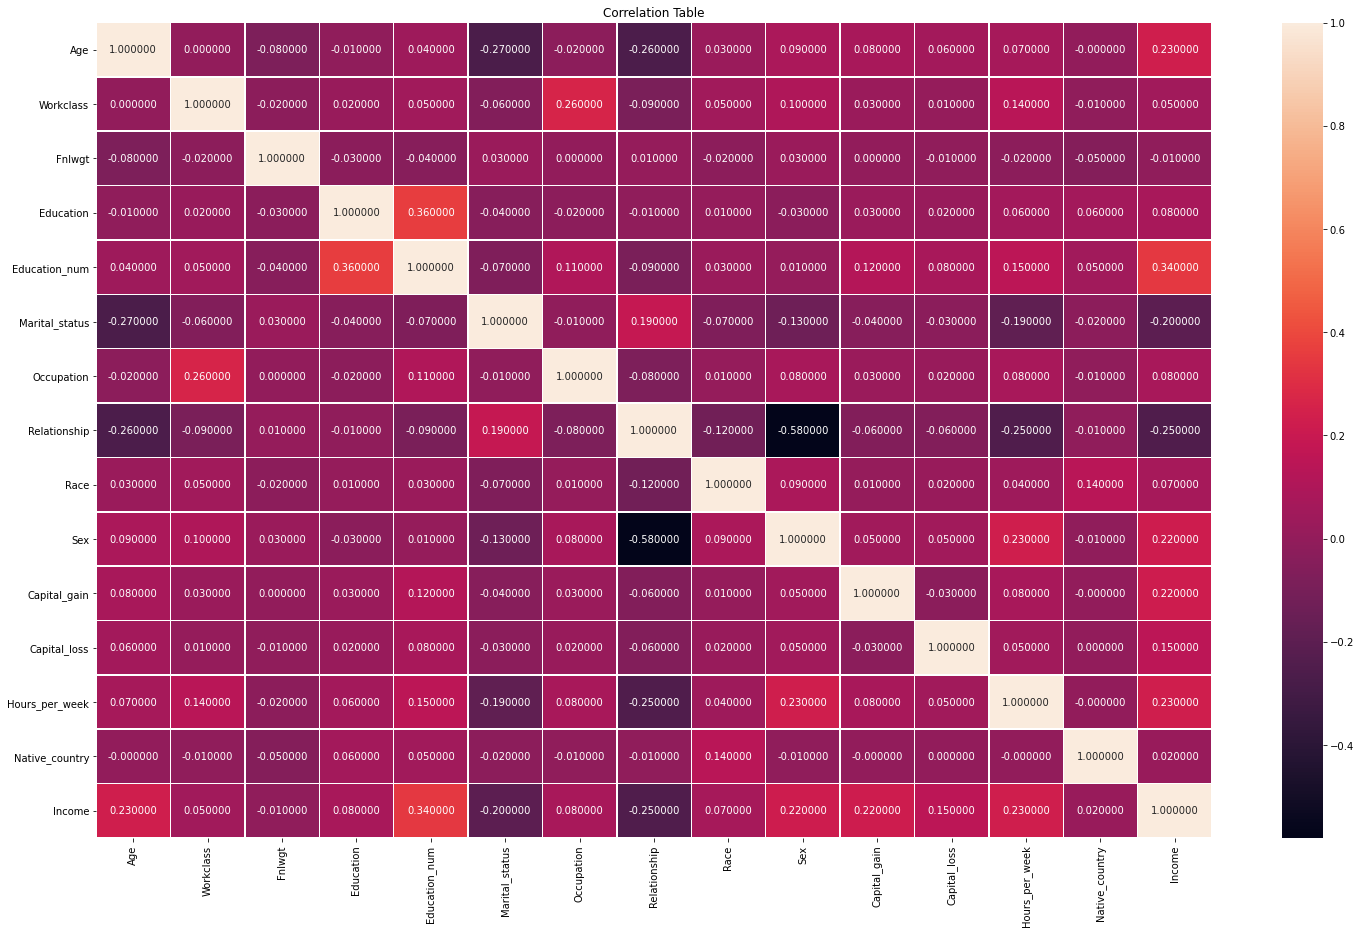

In [74]:
# Plotting Heatmap for the correlation table.
plt.figure(figsize=[25,15])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.5, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

Education number shows the max relation to income of being 34%.
Age and Hours per week have 23% of relation
sex and capital gain has 22% of relation
where as the fnlwgt,martial status and relationship columns have -ve correlation.

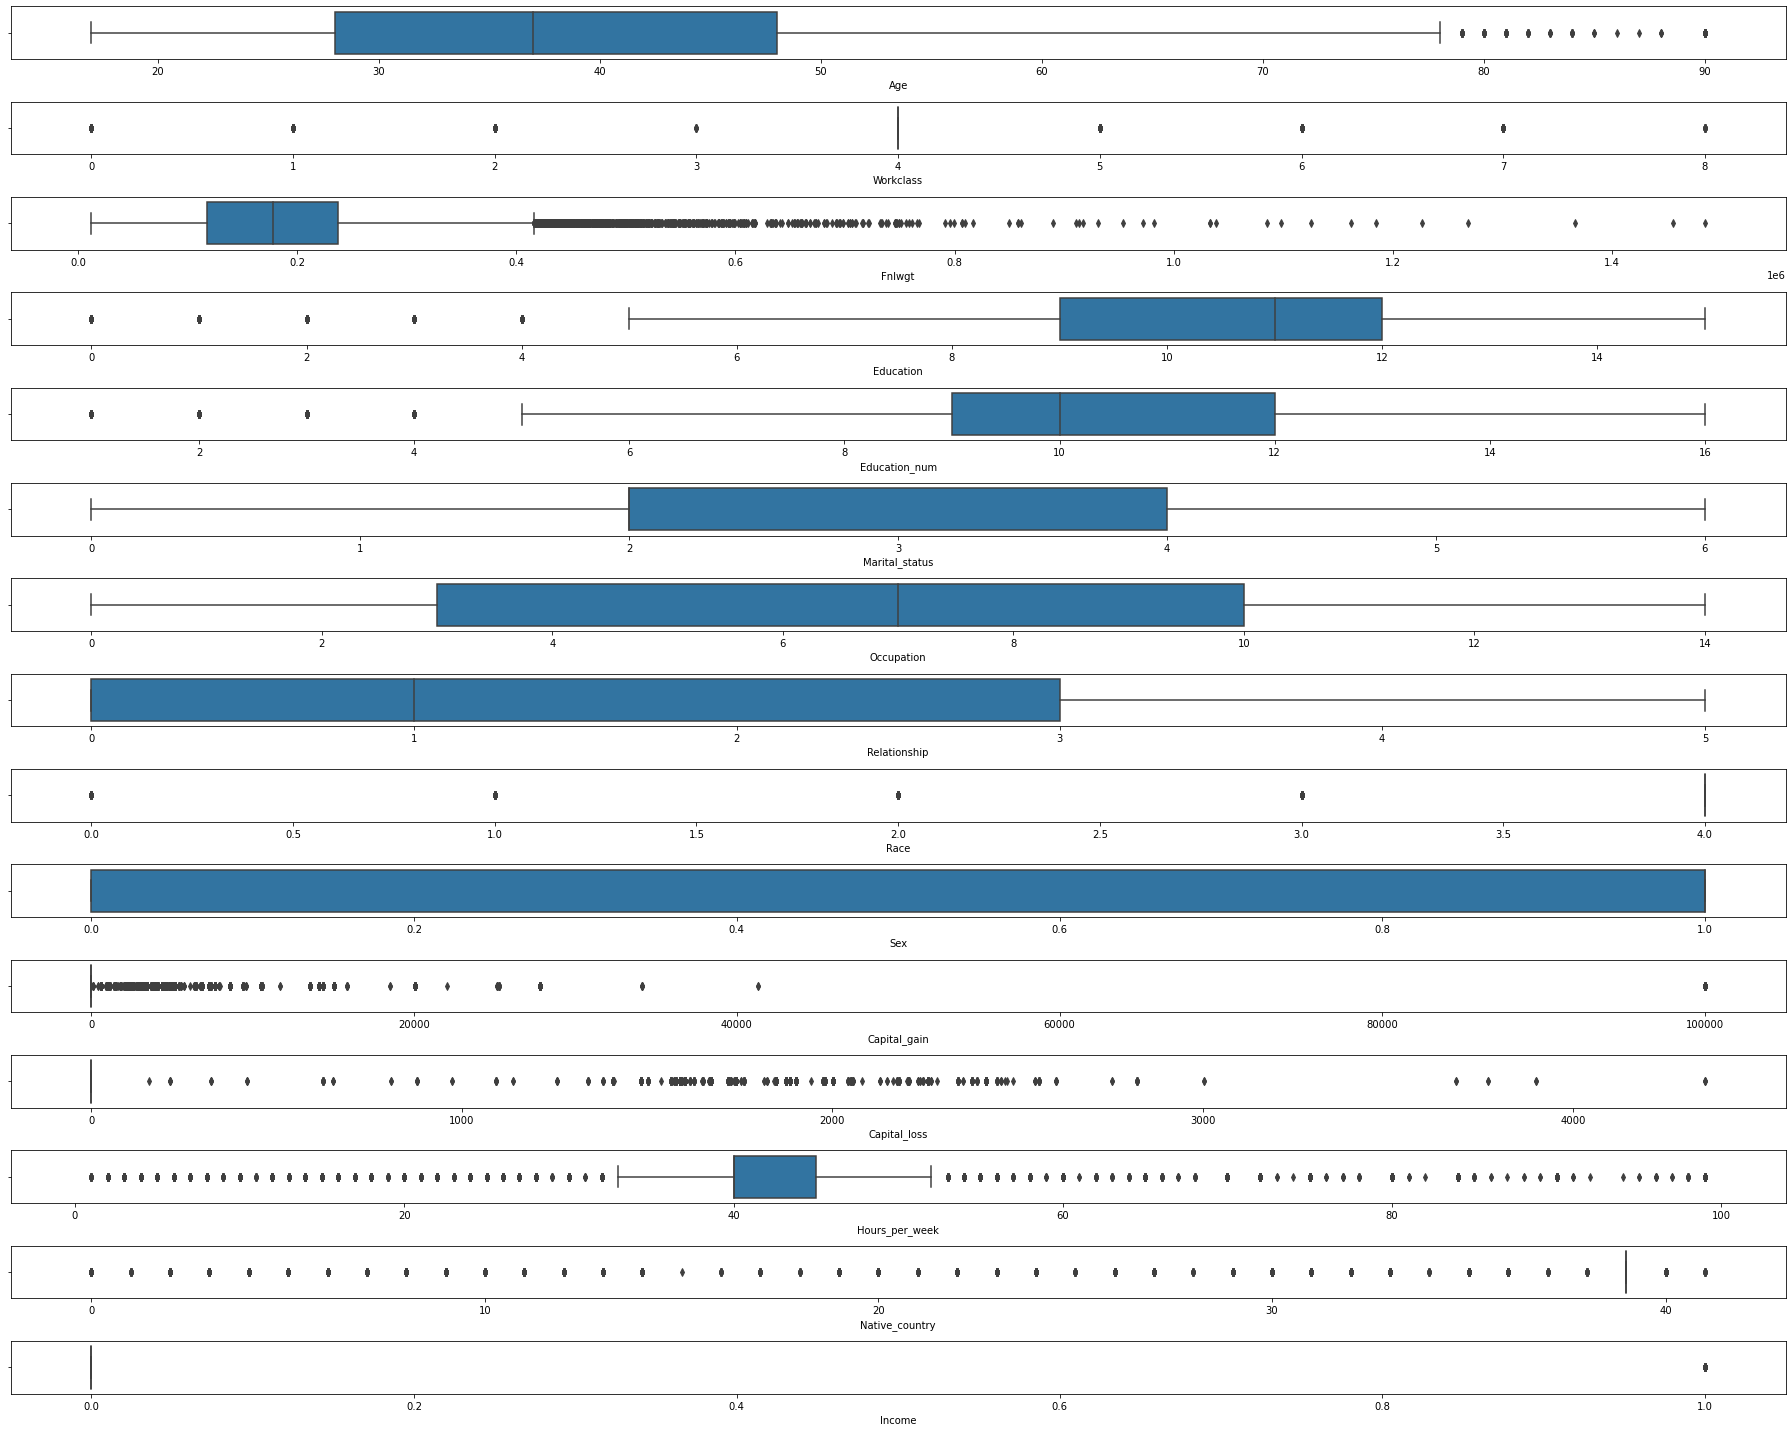

In [92]:
# checking for outliers
fig, axs = plt.subplots(15, figsize = (25,20))
plt1 = sns.boxplot(df['Age'], ax = axs[0])
plt2 = sns.boxplot(df['Workclass'], ax = axs[1])
plt3 = sns.boxplot(df['Fnlwgt'], ax = axs[2])
plt4 = sns.boxplot(df['Education'], ax = axs[3])
plt5 = sns.boxplot(df['Education_num'], ax = axs[4])
plt6 = sns.boxplot(df['Marital_status'], ax = axs[5])
plt7 = sns.boxplot(df['Occupation'], ax = axs[6])
plt8 = sns.boxplot(df['Relationship'], ax = axs[7])
plt9 = sns.boxplot(df['Race'], ax = axs[8])
plt10 = sns.boxplot(df['Sex'], ax = axs[9])
plt11 = sns.boxplot(df['Capital_gain'], ax = axs[10])
plt12 = sns.boxplot(df['Capital_loss'], ax = axs[11])
plt13 = sns.boxplot(df['Hours_per_week'], ax = axs[12])
plt14 = sns.boxplot(df['Native_country'], ax = axs[13])
plt15 = sns.boxplot(df['Income'], ax = axs[14])
plt.tight_layout()

Except for age,sex, martial status, relationship all the other columns have outliers.

In [95]:
#checking for skewness
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Threshold for skewness is from 0.5 to -0.5. Therfore the columns age,workclass,fnlwgt,education, relationship,race,sex, capital_gain, capital_loss, native_country and income columns has skewness. 

In [96]:
#Removing Outliers by zscore technique
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(32560, 15)

In [97]:
thershold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [99]:
df_new = df[(z<3).all(axis=1)]
print('original dataset is ',df.shape)
print('after removing the outliers is ',df_new.shape)

original dataset is  (32560, 15)
after removing the outliers is  (27417, 15)


In [101]:
# data loss
loss_per = ((32560-27417)/32560)*100
print('data lost in percentage ', loss_per)

data lost in percentage  15.795454545454547


In [102]:
#Removing Skewness
#Splitting the dataset into independent and dependent variables:

x = df_new.drop("Income", axis=1)
y = df_new["Income"]

In [103]:
#Power Transform
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

In [104]:
# Scaling data through Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

In [106]:
# Data imbalancing handling through oversampling
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)
y_over.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

In [107]:
# Finding best  random state
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7857142857142857  on Random_State  409


In [110]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=20)

# Model Training

1. Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7796835839598998
[[4820 1485]
 [1328 5135]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6305
           1       0.78      0.79      0.78      6463

    accuracy                           0.78     12768
   macro avg       0.78      0.78      0.78     12768
weighted avg       0.78      0.78      0.78     12768



We have 77% Accuracy

2. Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8999060150375939
[[5594  711]
 [ 567 5896]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6305
           1       0.89      0.91      0.90      6463

    accuracy                           0.90     12768
   macro avg       0.90      0.90      0.90     12768
weighted avg       0.90      0.90      0.90     12768



From RAndom Forest Classifier we have 89% accuracy.

3.K-Nearest Neighbors:

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8583176691729323
[[4943 1362]
 [ 447 6016]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      6305
           1       0.82      0.93      0.87      6463

    accuracy                           0.86     12768
   macro avg       0.87      0.86      0.86     12768
weighted avg       0.87      0.86      0.86     12768



From K-Nearest we have 85% accuracy.

In [116]:
# Cross VAlidation Score
# 1. For Logistic Regression
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

#2. Random Forest 
scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for Randonforest is ', scr.mean())

#3. For KNN
scr = cross_val_score(knn,x,y,cv=5)
print('Cross validation score for K-Nearest Neighbors is', scr.mean())

Cross validation score for LogisticRegression is  0.8285736178384671
Cross validation score for Randonforest is  0.8516615045004166
Cross validation score for K-Nearest Neighbors is 0.8236497985351713


he minimum diffrence between the accuracy score and cross validation score is (3.5), which is of K-Nearest Neighbors.
Hence it can be considered as the best model.

In [117]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance']}

GCV=GridSearchCV(knn,param_grid, verbose = 1, cv=3, n_jobs = -1)

In [118]:
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [119]:
# Finding the best parameter found by GridSearchCV
GCV.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [120]:
# Printing how the model looks like after hyper-parameter tuning
GCV.best_estimator_

KNeighborsClassifier(weights='distance')

In [121]:
model = GCV.predict(x_test)
print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6305
           1       0.82      0.95      0.88      6463

    accuracy                           0.87     12768
   macro avg       0.88      0.87      0.87     12768
weighted avg       0.88      0.87      0.87     12768



We got 87% with hyper parameter tunning.

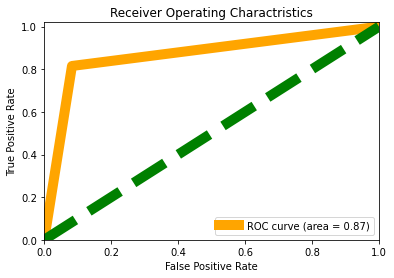

In [124]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(predknn, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='orange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='green', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

In [125]:
#saving the model
import pickle
filename = 'census_income.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [126]:
a = np.array(y_test)
predicted = np.array(knn.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,1
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
12763,0,1
12764,0,0
12765,0,0
12766,0,0
